In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv("resultados.csv")

data

,packet_loss,buffer,bandwidth_mbps
0,0,64000,520
1,0,208000,520
2,1000000,64000,520
3,1000000,208000,321
4,0,64000,526
5,0,208000,515
6,1000000,64000,319
7,1000000,208000,520
8,0,64000,319
9,0,208000,515


In [3]:
grouped = data.groupby(["packet_loss", "buffer"])["bandwidth_mbps"].agg(['mean', 'std']).reset_index()

grouped

,packet_loss,buffer,mean,std
0,0,64000,497.125,72.143582
1,0,208000,495.375,71.047142
2,1000000,64000,468.500,92.299203
3,1000000,208000,469.750,91.828645


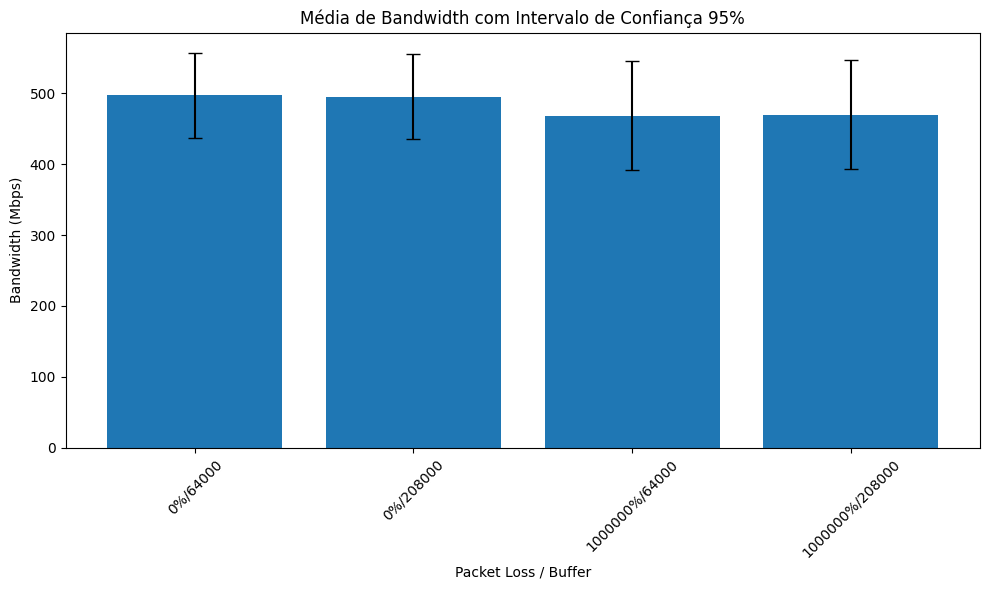

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

# Carrega os dados
data = pd.read_csv("resultados.csv")

# Agrupa os dados e calcula a média, contagem e erro padrão
grouped = data.groupby(["packet_loss", "buffer"])["bandwidth_mbps"].agg(['mean', 'std', 'count']).reset_index()

# Calcula o erro padrão da média (SEM)
grouped["sem"] = grouped["std"] / np.sqrt(grouped["count"])

# Calcula o intervalo de confiança 95% com t-student
confidence = 0.95
grouped["ci95"] = grouped["sem"] * stats.t.ppf((1 + confidence) / 2.0, grouped["count"] - 1)

# Gráfico de barras com erro
fig, ax = plt.subplots(figsize=(10, 6))

x = range(len(grouped))
ax.bar(x, grouped['mean'], yerr=grouped['ci95'], capsize=5)

# Rótulos do eixo x
ax.set_xticks(x)
ax.set_xticklabels([f"{pl}%/{buf}" for pl, buf in zip(grouped['packet_loss'], grouped['buffer'])], rotation=45)

# Títulos
ax.set_ylabel("Bandwidth (Mbps)")
ax.set_xlabel("Packet Loss / Buffer")
ax.set_title("Média de Bandwidth com Intervalo de Confiança 95%")

plt.tight_layout()
plt.show()
